# Load the Data set in to working directory

In [7]:
# Step 1: Install the Kaggle and KaggleHub libraries
# ------------------------------------------------------------------------------
# We use pip to install the necessary packages.
!pip install -q kaggle kagglehub

#==============================================================================
#  Part 2: Download the 'Dermnet' dataset using KaggleHub and Save to Drive
# ==============================================================================
# We will use the modern kagglehub library to download the dataset.
# It downloads to a local cache, and then we'll copy it to Google Drive.

import kagglehub
import os
import shutil

print("Downloading 'Dermnet' dataset with kagglehub...")
# This downloads the dataset to a temporary cache location and returns the path.
# The files are automatically unzipped.
cached_path = kagglehub.dataset_download("shubhamgoel27/dermnet")
print(f"Dataset downloaded to cache: {cached_path}")

# Define the path in your Google Drive where you want to save the dataset
working_path = '/content/Skin_desease_classification/dermnet'

os.makedirs(working_path, exist_ok=True)

# Now, we copy the files from the cache to your persistent Google Drive folder.
print(f"Copying dataset from cache to your directory at: {working_path}")

# Define the required classes
required_classes = ["Nail Fungus and other Nail Disease",
"Hair Loss Photos Alopecia and other Hair Diseases",
"Melanoma Skin Cancer Nevi and Moles",
"Vasculitis Photos",
"Acne and Rosacea Photos",
"Scabies Lyme Disease and other Infestations and Bites",
"Herpes HPV and other STDs Photos",
"Vascular Tumors",
"Warts Molluscum and other Viral Infections",
"Atopic Dermatitis Photos",
"Urticaria Hives",
"Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions",
"Lupus and other Connective Tissue diseases",
"Poison Ivy Photos and other Contact Dermatitis",
"Tinea Ringworm Candidiasis and other Fungal Infections",
"Eczema Photos",
"Exanthems and Drug Eruptions",
"Systemic Disease",
"Cellulitis Impetigo and other Bacterial Infections",
"Seborrheic Keratoses and other Benign Tumors",
"Psoriasis pictures Lichen Planus and related diseases",
"Light Diseases and Disorders of Pigmentation",
"Bullous Disease Photos"]


# Define the subdirectories within the cached path that contain the image classes
subdirs_to_copy_from = ["test", "train"]

for subdir in subdirs_to_copy_from:
    source_subdir_path = os.path.join(cached_path, subdir)
    destination_subdir_path = os.path.join(working_path, subdir)

    # Create the destination subdirectory
    os.makedirs(destination_subdir_path, exist_ok=True)

    if os.path.isdir(source_subdir_path):
        print(f"Processing subdirectory: {subdir}")
        # Loop through all items within the subdirectory
        for item in os.listdir(source_subdir_path):
            source_item = os.path.join(source_subdir_path, item)
            destination_item = os.path.join(destination_subdir_path, item)

            # Only copy if the item is a directory and is in the required_classes list
            if os.path.isdir(source_item) and item in required_classes:
                print(f"  Copying class: {item}")
                # Use copytree for directories
                shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
            elif not os.path.isdir(source_item):
                 # Copy files (like metadata files) directly
                 shutil.copy2(source_item, destination_item)


print("\nSubset of Dataset successfully stored in your working directory!")

Dataset downloaded to cache: /kaggle/input/dermnet
Copying dataset from cache to your directory at: /content/Skin_desease_classification/dermnet
Processing subdirectory: test
  Copying class: Light Diseases and Disorders of Pigmentation
  Copying class: Lupus and other Connective Tissue diseases
  Copying class: Acne and Rosacea Photos
  Copying class: Systemic Disease
  Copying class: Poison Ivy Photos and other Contact Dermatitis
  Copying class: Vascular Tumors
  Copying class: Urticaria Hives
  Copying class: Atopic Dermatitis Photos
  Copying class: Bullous Disease Photos
  Copying class: Hair Loss Photos Alopecia and other Hair Diseases
  Copying class: Tinea Ringworm Candidiasis and other Fungal Infections
  Copying class: Psoriasis pictures Lichen Planus and related diseases
  Copying class: Melanoma Skin Cancer Nevi and Moles
  Copying class: Nail Fungus and other Nail Disease
  Copying class: Scabies Lyme Disease and other Infestations and Bites
  Copying class: Eczema Photos

In [8]:
import os
import shutil
from pathlib import Path


def create_subset_of_data(source_dir, destination_dir, num_images_per_class=200):

  # Create destination directory if it doesn't exist
  os.makedirs(destination_dir, exist_ok=True)

  # Loop through each class folder
  for class_folder in os.listdir(source_dir):
      source_class_path = os.path.join(source_dir, class_folder)
      dest_class_path = os.path.join(destination_dir, class_folder)

      # Only proceed if it is a directory
      if os.path.isdir(source_class_path):
          os.makedirs(dest_class_path, exist_ok=True)

          # List image files and take the first num_images_per_class
          image_files = [f for f in os.listdir(source_class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
          selected_images = image_files[:num_images_per_class]

          # Copy selected images
          for img_file in selected_images:
              src_path = os.path.join(source_class_path, img_file)
              dst_path = os.path.join(dest_class_path, img_file)
              shutil.copy(src_path, dst_path)

  print("✅ Subset creation completed successfully!")


In [9]:
def get_files_list(data_path):

  classes=os.listdir(data_path)
  dic={}
  for i in classes:
      dic[i]= len(os.listdir(os.path.join(data_path,i)))
  print(f"{'=' * 10} Total Classes {len(dic.keys())} {'=' * 10} \n")
  for key,value in dic.items():
      print(key,":",value,"\n")
  return dic



In [10]:
# Source and destination paths for train data
source_dir = "/content/Skin_desease_classification/dermnet/train"
destination_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/train"

create_subset_of_data(source_dir, destination_dir, 200)

✅ Subset creation completed successfully!


In [11]:
_ = get_files_list(destination_dir)

========== Total Classes 23 ========== 

Melanoma Skin Cancer Nevi and Moles : 200 

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 200 

Acne and Rosacea Photos : 200 

Nail Fungus and other Nail Disease : 200 

Scabies Lyme Disease and other Infestations and Bites : 200 

Hair Loss Photos Alopecia and other Hair Diseases : 200 

Vasculitis Photos : 200 

Exanthems and Drug Eruptions : 200 

Urticaria Hives : 200 

Poison Ivy Photos and other Contact Dermatitis : 200 

Bullous Disease Photos : 200 

Warts Molluscum and other Viral Infections : 200 

Lupus and other Connective Tissue diseases : 200 

Vascular Tumors : 200 

Psoriasis pictures Lichen Planus and related diseases : 200 

Eczema Photos : 200 

Atopic Dermatitis Photos : 200 

Light Diseases and Disorders of Pigmentation : 200 

Tinea Ringworm Candidiasis and other Fungal Infections : 200 

Cellulitis Impetigo and other Bacterial Infections : 200 

Herpes HPV and other STDs Photos : 200 

Seborrheic Ke

In [12]:
# Source and destination paths for test data
source_dir = "/content/Skin_desease_classification/dermnet/test"
destination_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/test"

create_subset_of_data(source_dir, destination_dir, 20)

✅ Subset creation completed successfully!


In [13]:
_ = get_files_list(destination_dir)

========== Total Classes 23 ========== 

Melanoma Skin Cancer Nevi and Moles : 20 

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 20 

Acne and Rosacea Photos : 20 

Nail Fungus and other Nail Disease : 20 

Scabies Lyme Disease and other Infestations and Bites : 20 

Hair Loss Photos Alopecia and other Hair Diseases : 20 

Vasculitis Photos : 20 

Exanthems and Drug Eruptions : 20 

Urticaria Hives : 20 

Poison Ivy Photos and other Contact Dermatitis : 20 

Bullous Disease Photos : 20 

Warts Molluscum and other Viral Infections : 20 

Lupus and other Connective Tissue diseases : 20 

Vascular Tumors : 20 

Psoriasis pictures Lichen Planus and related diseases : 20 

Eczema Photos : 20 

Atopic Dermatitis Photos : 20 

Light Diseases and Disorders of Pigmentation : 20 

Tinea Ringworm Candidiasis and other Fungal Infections : 20 

Cellulitis Impetigo and other Bacterial Infections : 20 

Herpes HPV and other STDs Photos : 20 

Seborrheic Keratoses and other Ben

In [14]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
train_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/train"
test_dir = "/content/Skin_desease_classification/dermnet/sub_dermanet/test"

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


# visulaizing the images
for category in required_classes:
  #constructing the path
  path = os.path.join(train_dir, category)
  images = os.listdir(path)

  fig, ax = plt.subplots(1, 3, figsize = (10, 4))
  fig.suptitle(f'{category}', fontsize = 18)

  for i in range(3):
    img_name = images[np.random.randint(0, len(images))]
    img_path = os.path.join(path, img_name)
    img_array = cv2.imread(img_path)

    # converting the BGR images to RGB
    img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

    ax[i].imshow(img_rgb)
    ax[i].axis('off')


Output hidden; open in https://colab.research.google.com to view.

In [17]:
import os
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# CONFIG
# =============================
img_size = (224, 224)
batch_size = 32
seed = 42

# =============================
# Load Datasets
# =============================
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)

# =============================
# Compute Class Weights
# =============================
labels = []
for _, label_batch in train_ds.unbatch():
    labels.append(label_batch.numpy())

class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weight_dict = dict(enumerate(class_weights_array))

# =============================
# Augmentation Layer
# =============================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])


Found 4600 files belonging to 23 classes.
Using 3680 files for training.
Found 4600 files belonging to 23 classes.
Using 920 files for validation.
Found 460 files belonging to 23 classes.


In [18]:
class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [19]:
# =============================
# Model Building (Transfer Learning)
# =============================
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras import layers, models


def build_model(trainable_base=False):
    base_model = ConvNeXtTiny(include_top=False, weights="imagenet", input_shape=img_size + (3,))
    base_model.trainable = trainable_base

    inputs = tf.keras.Input(shape=img_size + (3,))
    x = data_augmentation(inputs)
    x = base_model(x, training=trainable_base)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

model = build_model(trainable_base=False)

# =============================
# Compile and Train (Top Layers)
# =============================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [20]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_tiny (Functional)      │ (None, 7, 7, 768)      │    27,820,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 768)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 23)             │        17,687 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,837,815 (106.19 MB)

 Trainable params: 17,687 (69.09 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

In [21]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("base_model_covn_bo_sub200_fullclass.keras", save_best_only=True, monitor='val_loss')
]


In [22]:
print("🟡 Training top layers...")
history = model.fit(
    train_ds.cache().prefetch(tf.data.AUTOTUNE),
    validation_data=val_ds.cache().prefetch(tf.data.AUTOTUNE),
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=callbacks
)


🟡 Training top layers...
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 76s 510ms/step - accuracy: 0.0688 - loss: 3.3318 - val_accuracy: 0.1913 - val_loss: 2.7503
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 59s 394ms/step - accuracy: 0.1994 - loss: 2.7954 - val_accuracy: 0.2359 - val_loss: 2.6142
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 386ms/step - accuracy: 0.2384 - loss: 2.6419 - val_accuracy: 0.2630 - val_loss: 2.5494
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 45s 391ms/step - accuracy: 0.2701 - loss: 2.5028 - val_accuracy: 0.2674 - val_loss: 2.5106
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 386ms/step - accuracy: 0.3061 - loss: 2.4549 - val_accuracy: 0.2717 - val_loss: 2.4840
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 385ms/step - accuracy: 0.3112 - loss: 2.3671 - val_accuracy: 0.2728 - val_loss: 2.4543
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 385ms/step - accuracy: 0.3238 - loss: 2.3458 - val_accuracy: 0.2793 - val_loss: 2.4457
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 384ms/step - a

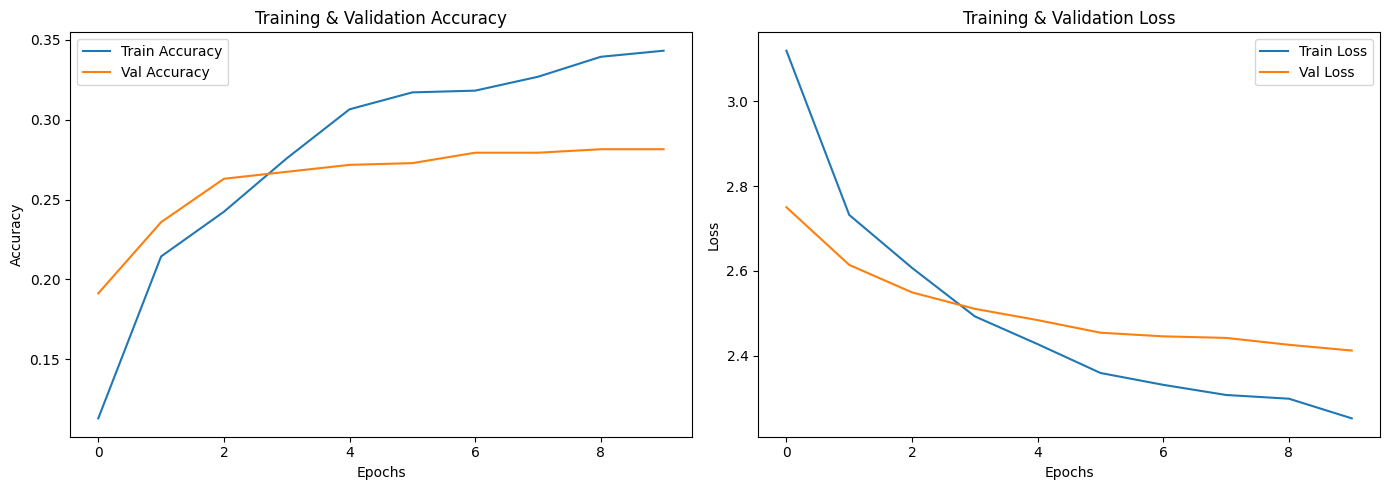

In [23]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call it with your history
plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


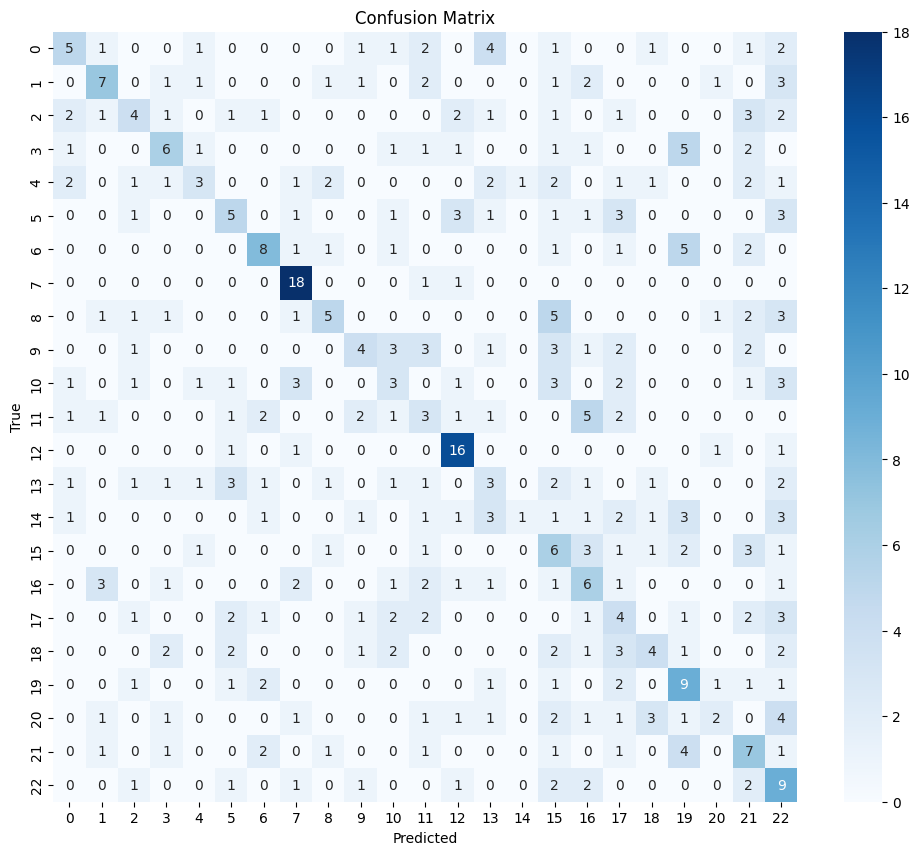

                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.36      0.25      0.29        20
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.44      0.35      0.39        20
                                          Atopic Dermatitis Photos       0.31      0.20      0.24        20
                                            Bullous Disease Photos       0.38      0.30      0.33        20
                Cellulitis Impetigo and other Bacterial Infections       0.33      0.15      0.21        20
                                                     Eczema Photos       0.28      0.25      0.26        20
                                      Exanthems and Drug Eruptions       0.44      0.40      0.42        20
                 Hair Loss Photos Alopecia and other Hair Diseases       0.60      0.90      0.72        20
                           

In [24]:
# Get predictions
def get_prediction(model):

  y_true = []
  y_pred = []

  for images, labels in test_ds:
      preds = model.predict(images)
      y_true.extend(labels.numpy())
      y_pred.extend(np.argmax(preds, axis=1))

  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(12, 10))
  sns.heatmap(cm, annot=True, cmap='Blues')
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()

  # Classification report
  class_names = test_ds.class_names
  print(classification_report(y_true, y_pred, target_names=class_names))

# base model prediction
get_prediction(model)